[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MikeS96/cv_dl/blob/main/week2/S2L2_descriptors_binary.ipynb)

## Image recognition

In [ ]:
from skimage.feature import hog, local_binary_pattern
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

import numpy as np
from matplotlib import pyplot as plt

### Loading image and visualization 

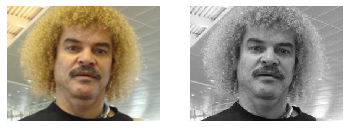

In [ ]:
# Loading image
img1 = imread('pibe.jpg')
img1_g = rgb2gray(img1)
# Plotting
plt.subplot(121)
plt.imshow(img1)
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.show()

### Processing image

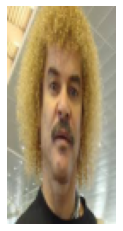

In [ ]:
# resizing image
img1_res = resize(img1, (128, 64))
plt.imshow(img1_res)
plt.axis('off')
plt.show()

## Computing HoG features and visualization

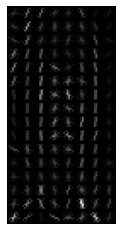

The lenght of the features is: 3780


In [ ]:
# Computing features
fd1, hog_1 = hog(img1_res, orientations = 9, pixels_per_cell = (8, 8), 
                 cells_per_block = (2,2), visualize = True)
plt.imshow(hog_1, cmap = 'gray')
plt.axis('off')
plt.show()
print('The lenght of the features is: {}'.format(len(fd1)))

### Using LBP to compute features

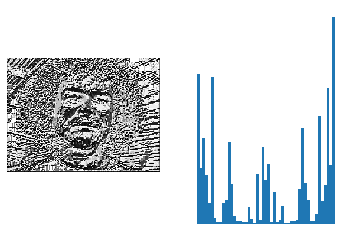

In [ ]:
# Computing LBP
lbp_pibe1 = local_binary_pattern(img1_g, 8, 1, method = 'default')

# Computing histogram
(hist, _) = np.histogram(lbp_pibe1.ravel(), bins = np.arange(0,11), range = (0, 255))
# Normalizing the histogram
hist = hist.astype('float')
hist /= (hist.sum() + 1e-7)

# Plotting the Binary map
plt.subplot(121)
plt.imshow(lbp_pibe1, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.subplot(122)
# Plotting histogram
# Valores entre 0 y 255, Un total de 50 bins
plt.hist(lbp_pibe1.ravel(), bins = np.linspace(0, 255, 50))
plt.axis('off')
plt.show()

## Face recognition

In [ ]:
# Method to compute histogram
def compute_hist(lbp_hist, n_bins: list, range_values: tuple):
  # Plotting histogram
  (hist, _) = np.histogram(lbp_hist.ravel(), bins = n_bins, range = range_values)
  # normalizing the histogram
  hist = hist.astype('float')
  hist /= (hist.sum() + 1e-7)
  return hist

### Loading and showing images

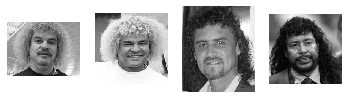

In [ ]:
# Load images
# Loading pibe.jpg
img1 = imread('pibe.jpg')
img1_g = rgb2gray(img1)
# Loading pibe2.jpg
img2 = imread('pibe2.jpg')
img2_g = rgb2gray(img2)
# Loading alvarez.jpg
img3 = imread('alvarez.jpg')
img3_g = rgb2gray(img3)
# Loading higuita.jpg
img4 = imread('higuita.jpg')
img4_g = rgb2gray(img4)

# Plotting images
plt.subplot(141)
plt.imshow(img1_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.subplot(142)
plt.imshow(img2_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.subplot(143)
plt.imshow(img3_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.subplot(144)
plt.imshow(img4_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.show()

### Computing histogram for each image

In [ ]:
norm_hist = []
lbp_list = []
for img_i in [img1_g, img2_g, img3_g, img4_g]:
  # Compute lbp
  lbp_hist = local_binary_pattern(img_i, 8, 1, method = 'default')
  lbp_list.append(lbp_hist)
  # Compute histogram
  curr_hist = compute_hist(lbp_hist, np.arange(0, 11), (0, 255))
  norm_hist.append(curr_hist)

In [ ]:
# List to map winner to answer (img)
idx2photo = {0: 'pibe.jpg', 1: 'pibe2.jpg', 2: 'alvarez.jpg', 3: 'higuita.jpg'}

### Computing the distance between histograms

In [ ]:
# Use only after Pibe
distancias_list = []
for hist in norm_hist[1:]:
  dst = np.linalg.norm(hist - norm_hist[0])
  distancias_list.append(dst)

In [ ]:
# Idx +1 as new list is norm_hist - 1
min_idx, min_val = distancias_list.index(min(distancias_list)) + 1, min(distancias_list)

### Printing results

The most similar image to the template pibe.jpg is pibe2.jpg
The distance between the template and the closest image is: 0.09349665128400422


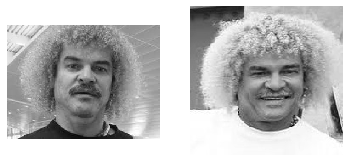

In [ ]:
# Printing results
print('The most similar image to the template {} is {}'.format(idx2photo[0], idx2photo[min_idx]))
print('The distance between the template and the closest image is: {}'.format(min_val))

# Printing winners
# Loading pibe.jpg
imgt = imread(idx2photo[0])
imgt_g = rgb2gray(imgt)
# Loading pibe2.jpg
imgw = imread(idx2photo[min_idx])
imgw_g = rgb2gray(imgw)

# Plotting images
plt.subplot(121)
plt.imshow(imgt_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.subplot(122)
plt.imshow(imgw_g, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.show()